# Numerical simulation of quantum Ising model using the core interface

In this notebook, we perform numerical simulations of the Ising model with quantum (mainly transverse magnetic field) effects using the OpenJij core interface.
First, define Graph and $J_{ij}, h_i$ of the system to be numerically simulated.
We simulate a system with random interactions and random longitudinal magnetic fields as [for the classical Ising model](./A003-LargeScaleMC.ipynb).

In [1]:
import openjij.cxxjij.graph as G
# Set the problem size to 100
N = 100

graph = G.Dense(N)

In [2]:
import numpy as np
mu, sigma = 0, 1

for i in range(N):
    for j in range(N):
        # Jij value would be too large, so we use 1/N for standardization.
        graph[i,j] = 0 if i == j else np.random.normal()/N

for i in range(N):
    graph[i] = np.random.normal()/N

The method of setting up the graph is the same as for the classical Ising model in the previous section.

## Set transverse magnetic field Ising model

The system is set up with the transverse magnetic field Ising model:

$$
H = s \left(\sum_{i<j}J_{ij}\sigma_i^z \sigma_j^z + \sum_{i=1}^{N}h_i \sigma_i^z \right) - \sum_{i=1}\Gamma (1-s) \sigma_i^x 
$$

The $\Gamma$ is fixed and $\beta$ and $s$ are varied to perform quantum Monte Carlo.
By default, the quantum Monte Carlo method with Suzuki and Trotter decomposition is implemented.

> A continuous imaginary-time quantum Monte Carlo method is also available, but it is currently implemented on a trial basis.

First, let us generate the system with `system.make_transverse_ising`.

In [3]:
import openjij.cxxjij.system as S

mysystem = S.make_transverse_ising(graph.gen_spin(), graph, 1.0, 4)

The spin sequence is the first argument, the graph is the second, the value of $\Gamma$ is the third, and the number of trotter slices is the fourth.
Now the system is with all trotter slices initialized with `graph.gen_spin()`.

Below we display all trotter spins with `mysystem.trotter_spins`. The vertical direction is the spatial direction and the horizontal direction is the trotter direction.
All trotter slices are initialized with the same spins.

In [4]:
print(mysystem.trotter_spins)

[[ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1

> Instead of `graph.gen_spin()` we can put the double list above to initialize the trotter spins directly.

## Run Algorithm with Updater

### Updater

For Quantum Monte Carlo methods, we currently have

* SingleSpinFlip (update one spin at a time using the Metropolis-Hasting method)

### Algorithm

#### Schedule list

The schedule list is given as a list of `(parameters, the number of Monte Carlo steps)` and for the transverse field Ising model as (($\beta$, $s$), the number of Monte Carlo steps). As an example, we do the following setup.

In [5]:
schedule_list = [((10, 0.1), 10),((12, 0.3), 80),((10, 0.8), 30)]

This means 10 Monte Carlo steps at inverse temperature $\beta=10, s=0.1$,  80 steps at $\beta=12, s=0.3$, and 30 steps at $\beta=0.1, s=0.8$ for a total of 120 Monte Carlo steps.
In performing annealing, it is more convenient to use the `make_transverse_field_schedule_list` in the `utility` as follows.

In [6]:
import openjij.cxxjij.utility as U
schedule_list = U.make_transverse_field_schedule_list(10, 20, 10)
print(schedule_list)

[((beta: 10.000000, s: 0.000000) mcs: 20), ((beta: 10.000000, s: 0.111111) mcs: 20), ((beta: 10.000000, s: 0.222222) mcs: 20), ((beta: 10.000000, s: 0.333333) mcs: 20), ((beta: 10.000000, s: 0.444444) mcs: 20), ((beta: 10.000000, s: 0.555556) mcs: 20), ((beta: 10.000000, s: 0.666667) mcs: 20), ((beta: 10.000000, s: 0.777778) mcs: 20), ((beta: 10.000000, s: 0.888889) mcs: 20), ((beta: 10.000000, s: 1.000000) mcs: 20)]


In the example above, $S$ is changed in 10 steps from $S=0$ to $S=1$ while fixing $\beta=10$ and calculating 20 Monte Carlo steps for each parameter. A total of 200 Monte Carlo steps are calculated.
The method of [Morita and Nishimori (2008)](https://aip.scitation.org/doi/10.1063/1.2995837) is applied to changing $s$.

#### Run the Algorithm

Next, execute Algorithm.
It can be written in exactly the same way as in the previous notebook.

In [7]:
import openjij.cxxjij.algorithm as A
A.Algorithm_SingleSpinFlip_run(mysystem, schedule_list)

Let us use the callback as in the previous chapter.
For the transverse magnetic field Ising model, we only need to create a function with the system and parameters (inverse temperature $\beta$, $s$) as arguments.  
As an example, below we create a callback that records the value of the system energy.

In [8]:
energies = []

def callback_log_energy(system, t):
    # graph is the object defined previously in the Graph module
    # Determine the classical spin 0 or 1 from the average value of each trotter slice
    classical_spin = [-1 if np.mean(s)<0 else 1 for s in system.trotter_spins[:-1]] # Exclude last spin because it is auxiliary
    energies.append(graph.calc_energy(classical_spin))

The same Algorithm is executed using this callback.

In [9]:
# Take a longer schedule (total of 20000 Monte Carlo steps)
schedule_list = U.make_transverse_field_schedule_list(10, 200, 100)
A.Algorithm_SingleSpinFlip_run(mysystem, schedule_list, callback_log_energy)

The recorded system energy is plotted with Monte Carlo steps on the horizontal axis and energy on the vertical axis as follows:

In [10]:
# !pip install matplotlib

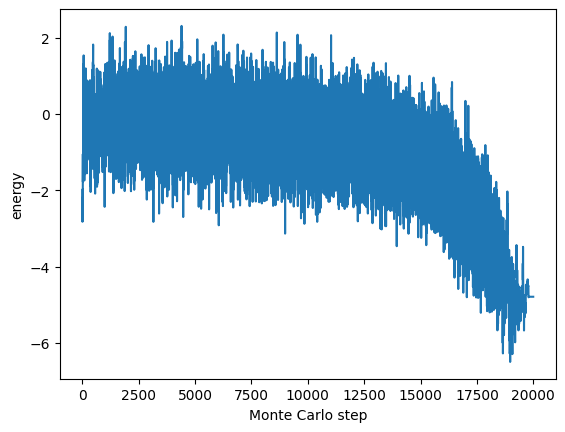

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(energies)), energies)
plt.xlabel('Monte Carlo step')
plt.ylabel('energy')
plt.show()

## Result

With `result.get_solutions` we get the classical spins that are the result of the calculation. This function returns the spin sequence with the lowest energy in the trotter slice since the focus is on the perspective of solving an optimization problem.

In [12]:
import openjij.cxxjij.result as R
print(R.get_solution(mysystem))

[-1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1]
